# Name -> Deven Chhajed
# Roll No-> 32
# Batch -> B1 (CSE)
# Prn -> 1032210789
# Decision Tree

In [11]:
# Load necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn import metrics  # For evaluating model performance using various metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, export_text  # For creating and visualizing Decision Tree models
from sklearn.metrics import accuracy_score  # For calculating the accuracy score of the model
import graphviz  # For rendering graph visualizations
from IPython.display import Image  # For displaying images within the Jupyter Notebook environment

In [13]:
data = {
    'Company': ['Google', 'Google', 'Google', 'Google', 'Google', 'Google', 'abc pharma', 'abc pharma', 'abc pharma', 'abc pharma', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook'],
    'Job': ['Sales Executive', 'Sales Executive', 'Business Manager', 'Business Manager', 'Computer programmer', 'Computer Programmer', 'Sales executive', 'Computer programmer', 'Business Manager', 'Business Manager', 'Sales Executive', 'Sales Executive', 'Business Manager', 'Business Manager', 'Computer Programmer', 'Computer Programmer'],
    'Degree': ['bachelors', 'masters', 'bachelors', 'masters', 'bachelors', 'masters', 'masters', 'bachelors', 'bachelors', 'masters', 'bachelors', 'masters', 'bachelors', 'masters', 'bachelors', 'masters'],
    'Salary_more_than_100k': [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

# Create a DataFrame using the provided data
df = pd.DataFrame(data)
df  # Display the DataFrame

,Company,Job,Degree,Salary_more_than_100k
0,Google,Sales Executive,bachelors,0
1,Google,Sales Executive,masters,0
2,Google,Business Manager,bachelors,1
3,Google,Business Manager,masters,1
4,Google,Computer programmer,bachelors,0
5,Google,Computer Programmer,masters,1
6,abc pharma,Sales executive,masters,0
7,abc pharma,Computer programmer,bachelors,0
8,abc pharma,Business Manager,bachelors,0
9,abc pharma,Business Manager,masters,1


In [14]:
# Extracting features (X) and target variable (y) from the DataFrame
x = df[['Company', 'Job', 'Degree']]  # Features: Company, Job, Degree
y = df[['Salary_more_than_100k']]  # Target variable: Salary_more_than_100k

# One-hot encoding categorical variables in 'x' using get_dummies
x = pd.get_dummies(x)

# Splitting the data into training and testing sets
# test_size=0.3 specifies that 30% of the data will be used for testing, while 70% will be used for training
# random_state=1 sets a seed for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [15]:
# Create a Decision Tree classifier object with specified parameters
clf = DecisionTreeClassifier(criterion='entropy', max_features='log2')

# Train the Decision Tree Classifier using the training data
clf = clf.fit(X_train, y_train)

# Predict the target variable for the test dataset using the trained model
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model by comparing predicted and actual values
accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f"Accuracy: {accuracy}")


Accuracy: 0.4


In [16]:
# Importing the necessary library for visualization
import matplotlib.pyplot as plt

# Setting the figure size for the decision tree plot
plt.figure(figsize=(110, 110))

# Plotting the decision tree
# clf: The trained decision tree classifier
# feature_names: Names of the features used in the model (from the x DataFrame)
# max_depth: Limiting the depth of the tree plot to 3 levels for better visualization
# filled: Fills the decision tree nodes with colors representing class distributions
plot_tree(clf, feature_names=x.columns, max_depth=3, filled=True)
plt.show()  # Display the decision tree plot

In [17]:
# Importing necessary libraries for confusion matrix and visualization
from sklearn.metrics import confusion_matrix  # For computing confusion matrix
import seaborn as sns  # For visualizing confusion matrix

In [18]:
# Use the trained decision tree classifier to predict the target variable for the test dataset
y_pred = clf.predict(X_test)

In [19]:
# Calculate the confusion matrix based on the actual test target values and predicted values
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[1, 1],
       [2, 1]])

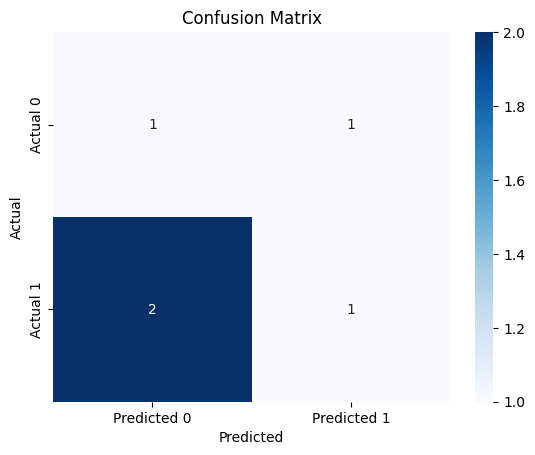

In [21]:
# Displaying the confusion matrix as a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Adding labels and title to the plot
plt.xlabel('Predicted')  # Label for the x-axis
plt.ylabel('Actual')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title of the plot

# Display the heatmap visualization of the confusion matrix
plt.show()